In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

from scipy.cluster.hierarchy import linkage, dendrogram

In [57]:
x, _ = make_blobs(n_samples = 100, centers = 1, cluster_std = 2, random_state = 42)

In [58]:
def divisive_clustering(data, max_clusters = 4):
    clusters = [data]
    labels = np.zeros(len(data), dtype = int)
    while len(clusters) < max_clusters:
        # find the cluster with the largest no of points
        # argmax is a function that returns the index of the maximum value in an array
        idx_to_split = np.argmax([len(c) for c in clusters])
        # this is the cluster we want to split the next
        cluster_to_split = clusters.pop(idx_to_split)
        # get a new label to assign to the neuly formed cluster
        current_label = np.max(labels) + 1
        # kmeans 
        kmeans = KMeans(n_clusters=2, random_state=42)
        split_labels = kmeans.fit_predict(cluster_to_split)
        # 
        cluster1 = cluster_to_split[split_labels == 0]
        cluster2 = cluster_to_split[split_labels == 1]
        # adds the neqw cluster back into the list
        clusters.append(cluster1)
        clusters.append(cluster2)
        # update label assignments
        label_indices = np.where([np.any(np.all(x == cluster_to_split, axis = 1)) for x in data])[0]
        label_subset = split_labels
        labels[label_indices[label_subset == 0 ]] = current_label
        labels[label_indices[label_subset == 1 ]] = current_label + 1

    return labels


In [59]:
cluster_labels = divisive_clustering(x, max_clusters = 4)

c:\Users\Madhur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Madhur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Madhur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


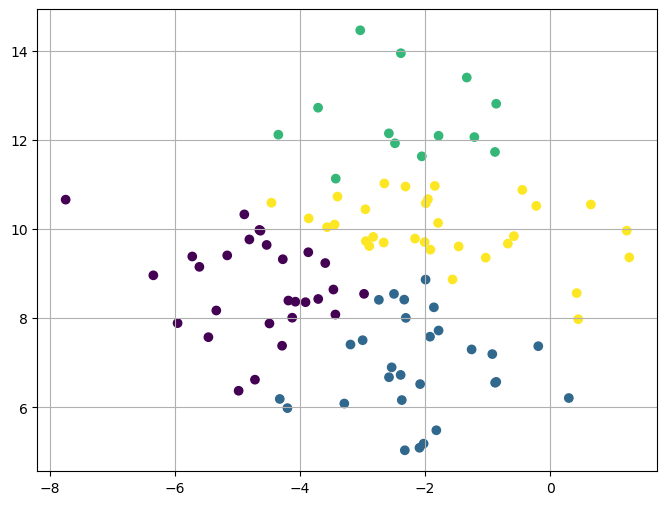

In [60]:
plt.figure(figsize = (8, 6))
plt.scatter(x[:,0], x[:,1], c = cluster_labels)
plt.grid(True)
plt.show()